<a href="https://colab.research.google.com/github/Huang-23/Huang-23.github.io/blob/master/B0729063_%E6%9C%9F%E4%B8%AD%E8%80%83%E8%A8%82%E6%AD%A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [ ]:
#1.1

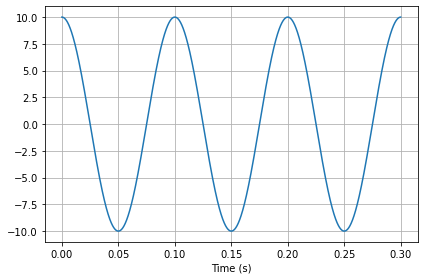

In [ ]:
import matplotlib.pyplot as pl
from thinkdsp import CosSignal
cos_sig = CosSignal(freq=10, amp=10.0, offset=0)

from thinkdsp import decorate
cos_sig.plot()
decorate(xlabel='Time (s)')
pl.grid()

In [ ]:
#1.2

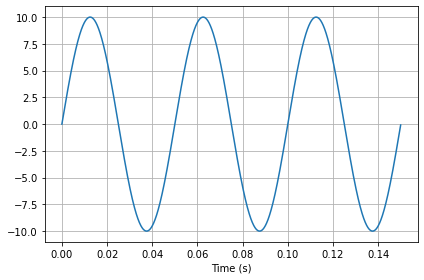

In [ ]:
from thinkdsp import SinSignal
sin_sig = SinSignal(freq=20, amp=10.0, offset=0)

sin_sig.plot()
decorate(xlabel='Time (s)')
pl.grid()

In [ ]:
#1.3

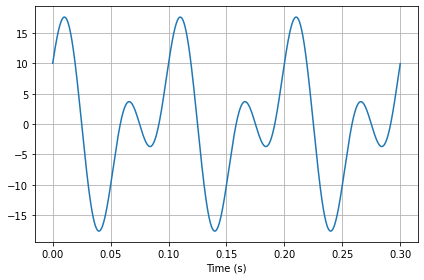

In [ ]:
mix = sin_sig + cos_sig
mix.plot()
decorate(xlabel='Time (s)')
pl.grid()

In [ ]:
#1.4

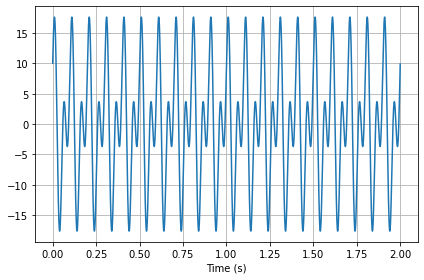

In [ ]:
duration = mix.period * 20 
wave = mix.make_wave(duration) 
wave.plot() 
decorate(xlabel='Time (s)') 
pl.grid()

In [ ]:
#1.5

In [ ]:
wave = mix.make_wave(duration=mix.period * 20,start=0,framerate=1000)
print('Number of samples', len(wave.ys))

Number of samples 2000


In [ ]:
#1.6

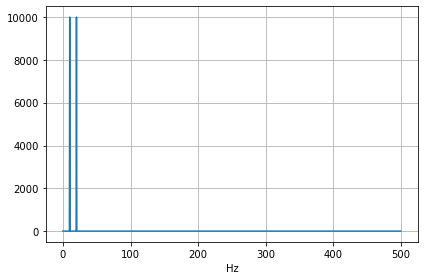

In [ ]:
x= mix.make_wave(duration=mix.period * 20, framerate= 1000) 
x1= x.make_spectrum() 
x1.plot() 
decorate(xlabel='Hz') 
pl.grid()

In [ ]:
#1.7

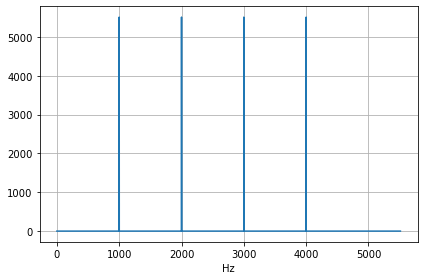

In [ ]:
sin1=SinSignal(freq=1000,amp=0.25)
sin2=SinSignal(freq=3000,amp=0.25)
cos1=CosSignal(freq=2000,amp=0.25)
cos2=CosSignal(freq=4000,amp=0.25)
mix2=sin1+sin2+cos1+cos2
wave2=mix2.make_wave(duration=4)
spec2=wave2.make_spectrum()
pl.grid()
spec2.plot()
decorate(xlabel='Hz')

In [ ]:
#1.8.1

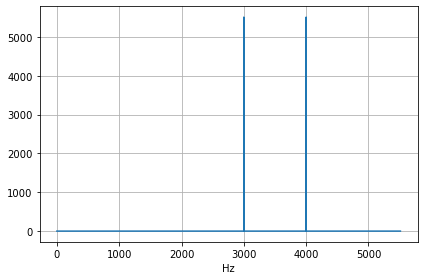

In [ ]:
spec2.high_pass(3000)
spec2.plot()
pl.grid()
decorate(xlabel='Hz')

In [ ]:
#1.8.2

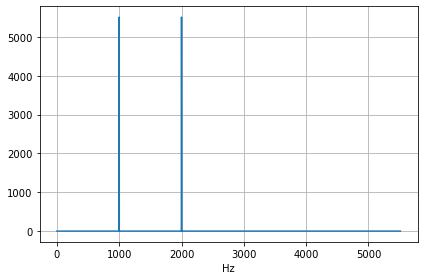

In [ ]:
sin1=SinSignal(freq=1000,amp=0.25)
sin2=SinSignal(freq=3000,amp=0.25)
cos1=CosSignal(freq=2000,amp=0.25)
cos2=CosSignal(freq=4000,amp=0.25)
mix2=sin1+sin2+cos1+cos2
wave2=mix2.make_wave(duration=4)
spec2=wave2.make_spectrum()
spec2.low_pass(2000)
spec2.plot()
pl.grid()
decorate(xlabel='Hz')

In [ ]:
#2.1

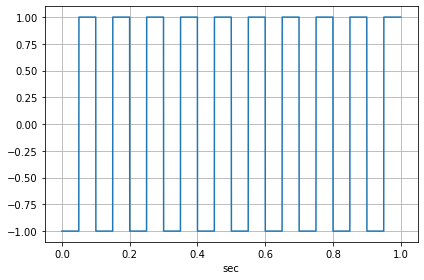

In [ ]:
from thinkdsp import SquareSignal 
sign = SquareSignal(10) 
duration = sign.period*10 
segment = sign.make_wave(duration, framerate=10000) 
segment.plot() 
decorate(xlabel='sec') 
pl.grid()

In [ ]:
#2.2

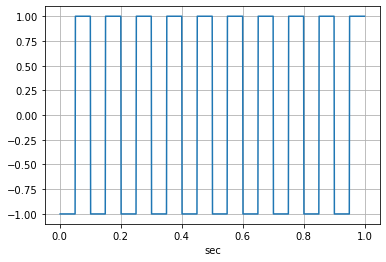

In [ ]:
import numpy as np 
import matplotlib.pyplot as pl
from scipy import signal
t = np.linspace(1, 0, 1000, endpoint=False) 
pl.plot(t, signal.square(-2 * np.pi * 10 * t))
pl.xlabel('sec')
pl.grid()

In [ ]:
#3.1

信號經取樣後頻譜發生重疊之現象，即高於採樣頻率一半的頻率成分將被重建成低於採樣頻率一半的訊號，此稱為混疊效應(Aliasing Effect)。而重建出來的訊號稱為原訊號的混疊替身，因為這兩個訊號有同樣的樣本值。
舉例：
![image-2.png](attachment:image-2.png)

In [ ]:
#3.2

1)提高採樣頻率，使之達到最高訊號頻率的兩倍以上。
2)引入低通濾波器或提高低通濾波器的參數；該低通濾波器通常稱為抗混疊濾波器。

In [ ]:
#4.1

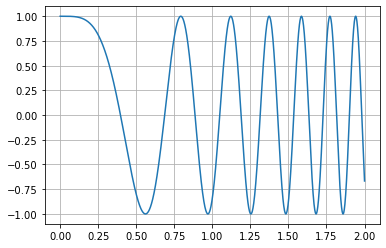

In [ ]:
import numpy as np
import matplotlib.pyplot as pl
import thinkdsp as td
a=10
sampleRate=1000
t=np.linspace(0,2,2*sampleRate+1)
x=np.cos(a*t**2)
w=td.Wave(x, framerate=sampleRate)
w.plot()
pl.grid()

In [ ]:
#4.2

執行結果如上圖，繪製出x(t)=cos(a*t^2)的圖形。

In [ ]:
#4.3

在第三行加入import thinkdsp as td

In [ ]:
#4.4

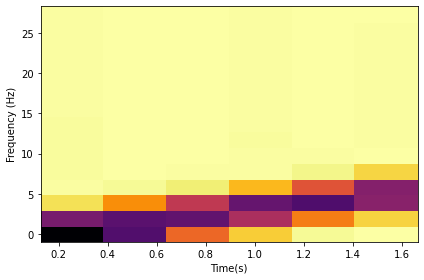

In [ ]:
spectrum=w.make_spectrogram(seg_length=512)
spectrum.plot(high=30)
decorate(xlabel='Time(s)', ylabel='Frequency (Hz)')